<a href="https://colab.research.google.com/github/Saguirre9911/Tensroflow_tutoriales/blob/main/Ejemplos%20de%20aplicacion/Tensorflow_Clasificador_de_enfermedades_en_platnas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PAL INGENIERO 2021
## Clasificador de imagenes tensorflow 2.*

Hola a todos, en este nootebook explicaremos como crear una CNN para la clasificación de enfermedades en plantas usando el dataset plant_village que viene con tensorflow


## Canal PAL INGENIERO
https://www.youtube.com/channel/UCTL8_Xr6vzTmCU2h3reHgPw

## Repositorio del notebook



In [1]:
#Librerias a utilizar
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
import tensorflow_datasets as tfds
from tensorflow import keras
%matplotlib inline

# CARGAR DATASET CON TFDS

In [2]:
ds_train, ds_info = tfds.load(
    'plant_village',#Nombre del set de datos
     split='train', #las opciones pueden variar, algunos tienen solo trainset, otros train, val y test set
      with_info=True, #Guardamos en una variable la información del dataset
      as_supervised=True,#, #generamos el dataset en tuplas, (imagen,etiqueta)
      shuffle_files=True) #Revolvemos el dataset
ds_info
ds_train=ds_train.take(10000)
ds_test_min=ds_train
ds_test=ds_test_min.take(1000)

# Procesamiento necesario para utilizar el dataset

In [3]:
def normalizar_datos(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label
BATCH_SIZE=16
#PARA EL SET DE ENTRENAMIENTO
ds_train = ds_train.map(normalizar_datos)# Normalizar los datos, pasa de 0-255 a 0-1
ds_train = ds_train.cache()#Cacheamos el set de datos para que las iteraciones tomen menos tiempo
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)#Se mezclan aleatoriamente, el buffer_size debe ser de la cantidad de datos del dataset para que sea efectivo
ds_train = ds_train.batch(BATCH_SIZE)# agrupamos en lotes de 64 el dataset #IMPORTANTE
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE) #PRECARGAMOS EL DATASET PARA SU USO #MÁS IMPORTANTE, sin esto, no se podrá usar el dataset
#PARA EL SET DE PRUEBA
ds_test= ds_test.map(normalizar_datos)# Normalizar los datos, pasa de 0-255 a 0-1
#ds_test_min=ds_test
ds_test = ds_test.batch(BATCH_SIZE)# agrupamos en lotes de 64 el dataset #IMPORTANTE
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE) #PRECARGAMOS EL DATASET PARA SU USO #MÁS IMPORTANTE, sin esto, no se podrá usar el dataset


## Adquirimos el tamaño de las imagenes para la capa de entrada de la CNN

In [4]:
ds = tfds.load('plant_village', split='train')
ds = ds.take(1)  # tomamos solo un dato

for example in ds:  # example es `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  image = example["image"]
  input_shape= image.shape
  label = example["label"]
  print(input_shape, label)


['image', 'image/filename', 'label']
(256, 256, 3) tf.Tensor(35, shape=(), dtype=int64)


# Construcción del modelo con Sequential API

### Tutorial PAL INGENIERO
https://www.youtube.com/watch?v=dMHxECuxgyg&list=PLeu9kmTazPwybTtzTe_mBH18BbIELn083 

In [5]:
def get_model(input_shape):
    """
    Creamos una CNN por medio de la API Sequencial, en este link se puede encontrar
    3 tutoriales hechos por nosotros al respecto, donde vemos la creación del modelo
    el método compile y el método fit https://www.youtube.com/watch?v=dMHxECuxgyg&list=PLeu9kmTazPwybTtzTe_mBH18BbIELn083
    
    """

    model = Sequential([
                    tf.keras.Input(input_shape),
                    Conv2D(filters=8, kernel_size=3, padding='same', activation= 'relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(38, activation='softmax')

    ])
    return model
model = get_model(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 8)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                8388672   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 38)                2470      
Total params: 8,395,526
Trainable params: 8,395,526
Non-trainable params: 0
______________________________________________

In [6]:
def compile_model(model):
    """
    Compilamos el modelo con el método compile, en este link se puede encontrar
    3 tutoriales hechos por nosotros al respecto, donde vemos la creación del modelo
    el método compile y el método fit https://www.youtube.com/watch?v=dMHxECuxgyg&list=PLeu9kmTazPwybTtzTe_mBH18BbIELn083
    """
    model.compile(
        optimizer='adam',
        loss = keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
compile_model(model)

In [7]:
def train_model(model, train_dataset):
    """
    Entrenamos el modelo con el método fit, en este link se puede encontrar
    3 tutoriales hechos por nosotros al respecto, donde vemos la creación del modelo
    el método compile y el método fit https://www.youtube.com/watch?v=dMHxECuxgyg&list=PLeu9kmTazPwybTtzTe_mBH18BbIELn083
    """
    history = model.fit(train_dataset, epochs=5, batch_size=BATCH_SIZE)
    return history

history = model.fit(ds_train, epochs=30,verbose=2)

Epoch 1/30
625/625 - 16s - loss: 2.5095 - accuracy: 0.3699
Epoch 2/30
625/625 - 6s - loss: 1.3989 - accuracy: 0.5818
Epoch 3/30
625/625 - 6s - loss: 0.9819 - accuracy: 0.6930
Epoch 4/30
625/625 - 6s - loss: 0.6913 - accuracy: 0.7789
Epoch 5/30
625/625 - 6s - loss: 0.4454 - accuracy: 0.8609
Epoch 6/30
625/625 - 6s - loss: 0.3088 - accuracy: 0.9017
Epoch 7/30
625/625 - 6s - loss: 0.2284 - accuracy: 0.9290
Epoch 8/30
625/625 - 6s - loss: 0.1547 - accuracy: 0.9548
Epoch 9/30
625/625 - 6s - loss: 0.1135 - accuracy: 0.9656
Epoch 10/30
625/625 - 6s - loss: 0.1524 - accuracy: 0.9536
Epoch 11/30
625/625 - 5s - loss: 0.0948 - accuracy: 0.9716
Epoch 12/30
625/625 - 6s - loss: 0.0743 - accuracy: 0.9765
Epoch 13/30
625/625 - 5s - loss: 0.0913 - accuracy: 0.9722
Epoch 14/30
625/625 - 6s - loss: 0.0941 - accuracy: 0.9726
Epoch 15/30
625/625 - 6s - loss: 0.0791 - accuracy: 0.9750
Epoch 16/30
625/625 - 6s - loss: 0.0866 - accuracy: 0.9741
Epoch 17/30
625/625 - 5s - loss: 0.0538 - accuracy: 0.9833
Epoch

## Prueba de funcioanamiento

tf.Tensor(15, shape=(), dtype=int64)
25


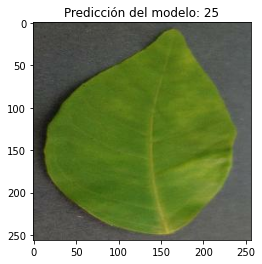

tf.Tensor(33, shape=(), dtype=int64)
4


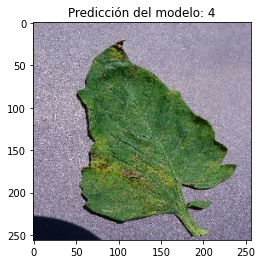

tf.Tensor(1, shape=(), dtype=int64)
4


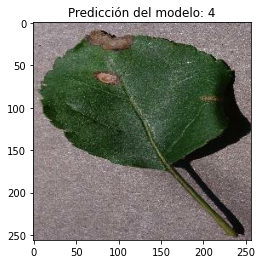

tf.Tensor(3, shape=(), dtype=int64)
4


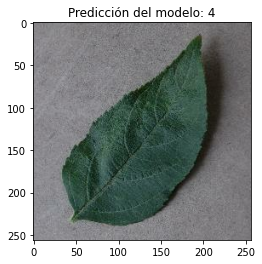

tf.Tensor(0, shape=(), dtype=int64)
0


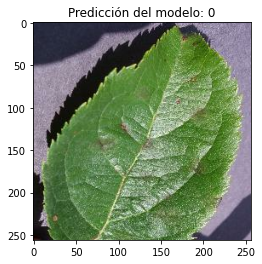

tf.Tensor(24, shape=(), dtype=int64)
4


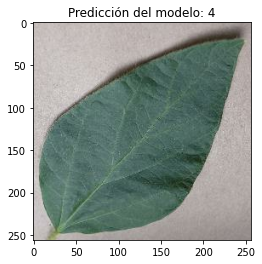

tf.Tensor(20, shape=(), dtype=int64)
20


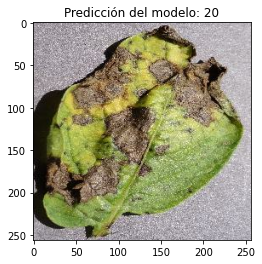

tf.Tensor(20, shape=(), dtype=int64)
33


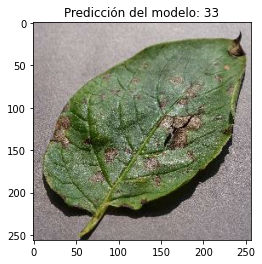

tf.Tensor(24, shape=(), dtype=int64)
4


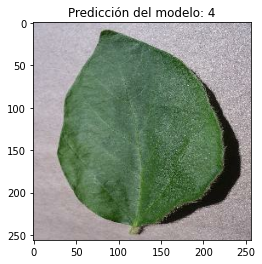

tf.Tensor(35, shape=(), dtype=int64)
30


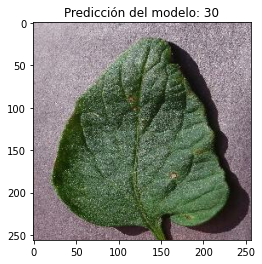

In [8]:
ds_test_min = ds_test_min.take(10)

for example in ds_test_min:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  image = example[0]
  label = example[1]
  print( label)
  predictions = model.predict(image[np.newaxis, ...])
  plt.imshow(tf.squeeze(image))
  print(np.argmax(predictions))
  plt.title(f"Predicción del modelo: {np.argmax(predictions)}")
  plt.show()


In [9]:
print(np.argmax(predictions))

30


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

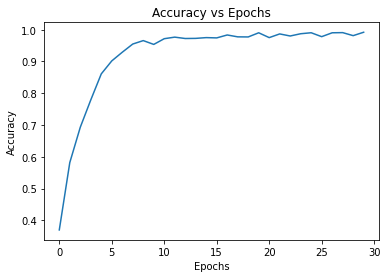

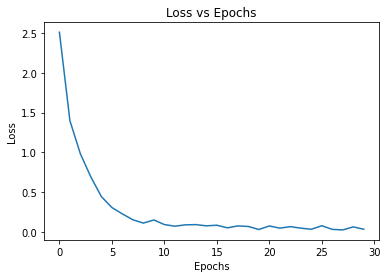

In [10]:
frame = pd.DataFrame(history.history)
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")



In [11]:
(test_loss, test_accuracy) = model.evaluate(ds_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

63/63 [==============================] - 1s 13ms/step - loss: 0.0094 - accuracy: 0.9980
Test loss: 0.009415684267878532
Test accuracy: 0.9980000257492065
